In [1]:
%load_ext autoreload
%autoreload 2

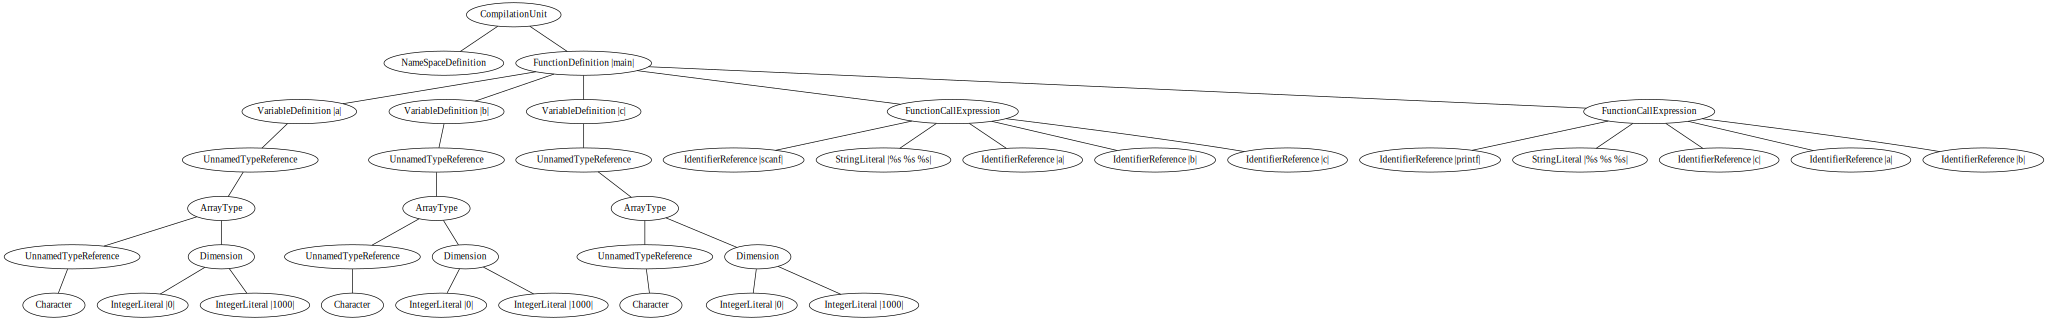

In [2]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000\ai4code_astm2\p02717\s008539667.cpp.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [2]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000\ai4code_problem_class_astm", r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000\ai4code_astm", 700, 50, 50)

In [3]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02722 ...
... finished p02722
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02732 ...
... finished p02732
processing p02765 ...
... finished p02765
processing p02767 ...
... finished p02767
processing p02787 ...
... finished p02787
processing p02792 ...
... finished p02792
processing p02814 ...
... finished p02814
processing p02818 ...
... finished p02818
processing p02831 ...
... finished p02831
processing p02835 ...
... finished p02835
processing p02841 ...
... finished p02841
processing p02847 ...
... finished p02847
processing p02853 ...
... finished p02853
processing p02856 ...
... finished p02856
processing p02860 ...
... finished p02860
processing p02891 ...
... finished p02891
processing p02900 ...
... finished p02900
processing p02913 ...
... finished p02913
processing p02935 ...
... finished p02935
processing p02936 ...
... finished p02936
processing p02951 ...
... finished

In [3]:
dataset.get_vocabulary_map()

{'ASTM_UNK': 1,
 'Add': 2,
 'AddressOf': 3,
 'AggregateExpression': 4,
 'And': 5,
 'ArrayAccess': 6,
 'Assign': 7,
 'BinaryExpression': 8,
 'BitAnd': 9,
 'BitLeftShift': 10,
 'BitNot': 11,
 'BitOr': 12,
 'BitRightShift': 13,
 'BitXor': 14,
 'BlockStatement': 15,
 'BooleanLiteral': 16,
 'BreakStatement': 17,
 'CaseBlock': 18,
 'CastExpression': 19,
 'CatchBlock': 20,
 'CharLiteral': 21,
 'ClassType': 22,
 'CollectionExpression': 23,
 'CompilationUnit': 24,
 'ConditionalExpression': 25,
 'ContinueStatement': 26,
 'Decrement': 27,
 'DefaultBlock': 28,
 'Deref': 29,
 'DerivesFrom': 30,
 'Divide': 31,
 'DoWhileStatement': 32,
 'EmptyStatement': 33,
 'EnumLiteralDefinition': 34,
 'EnumType': 35,
 'Equal': 36,
 'Exponent': 37,
 'ForCheckBeforeStatement': 38,
 'FormalParameterDeclaration': 39,
 'FormalParameterDefinition': 40,
 'FunctionCallExpression': 41,
 'FunctionDeclaration': 42,
 'FunctionDefinition': 43,
 'Greater': 44,
 'IdentifierReference': 45,
 'IfStatement': 46,
 'Increment': 47,
 

In [4]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [5]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

70000/70000 [==============================] - 573s 8ms/step - loss: 0.5272 - categorical_accuracy: 0.8751 - precision: 0.9432 - recall: 0.8345 - val_loss: 0.2945 - val_categorical_accuracy: 0.9266 - val_precision: 0.9458 - val_recall: 0.9186


In [6]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5000/5000 [==============================] - 33s 7ms/step - loss: 0.2697 - categorical_accuracy: 0.9294 - precision: 0.9441 - recall: 0.9194


In [7]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

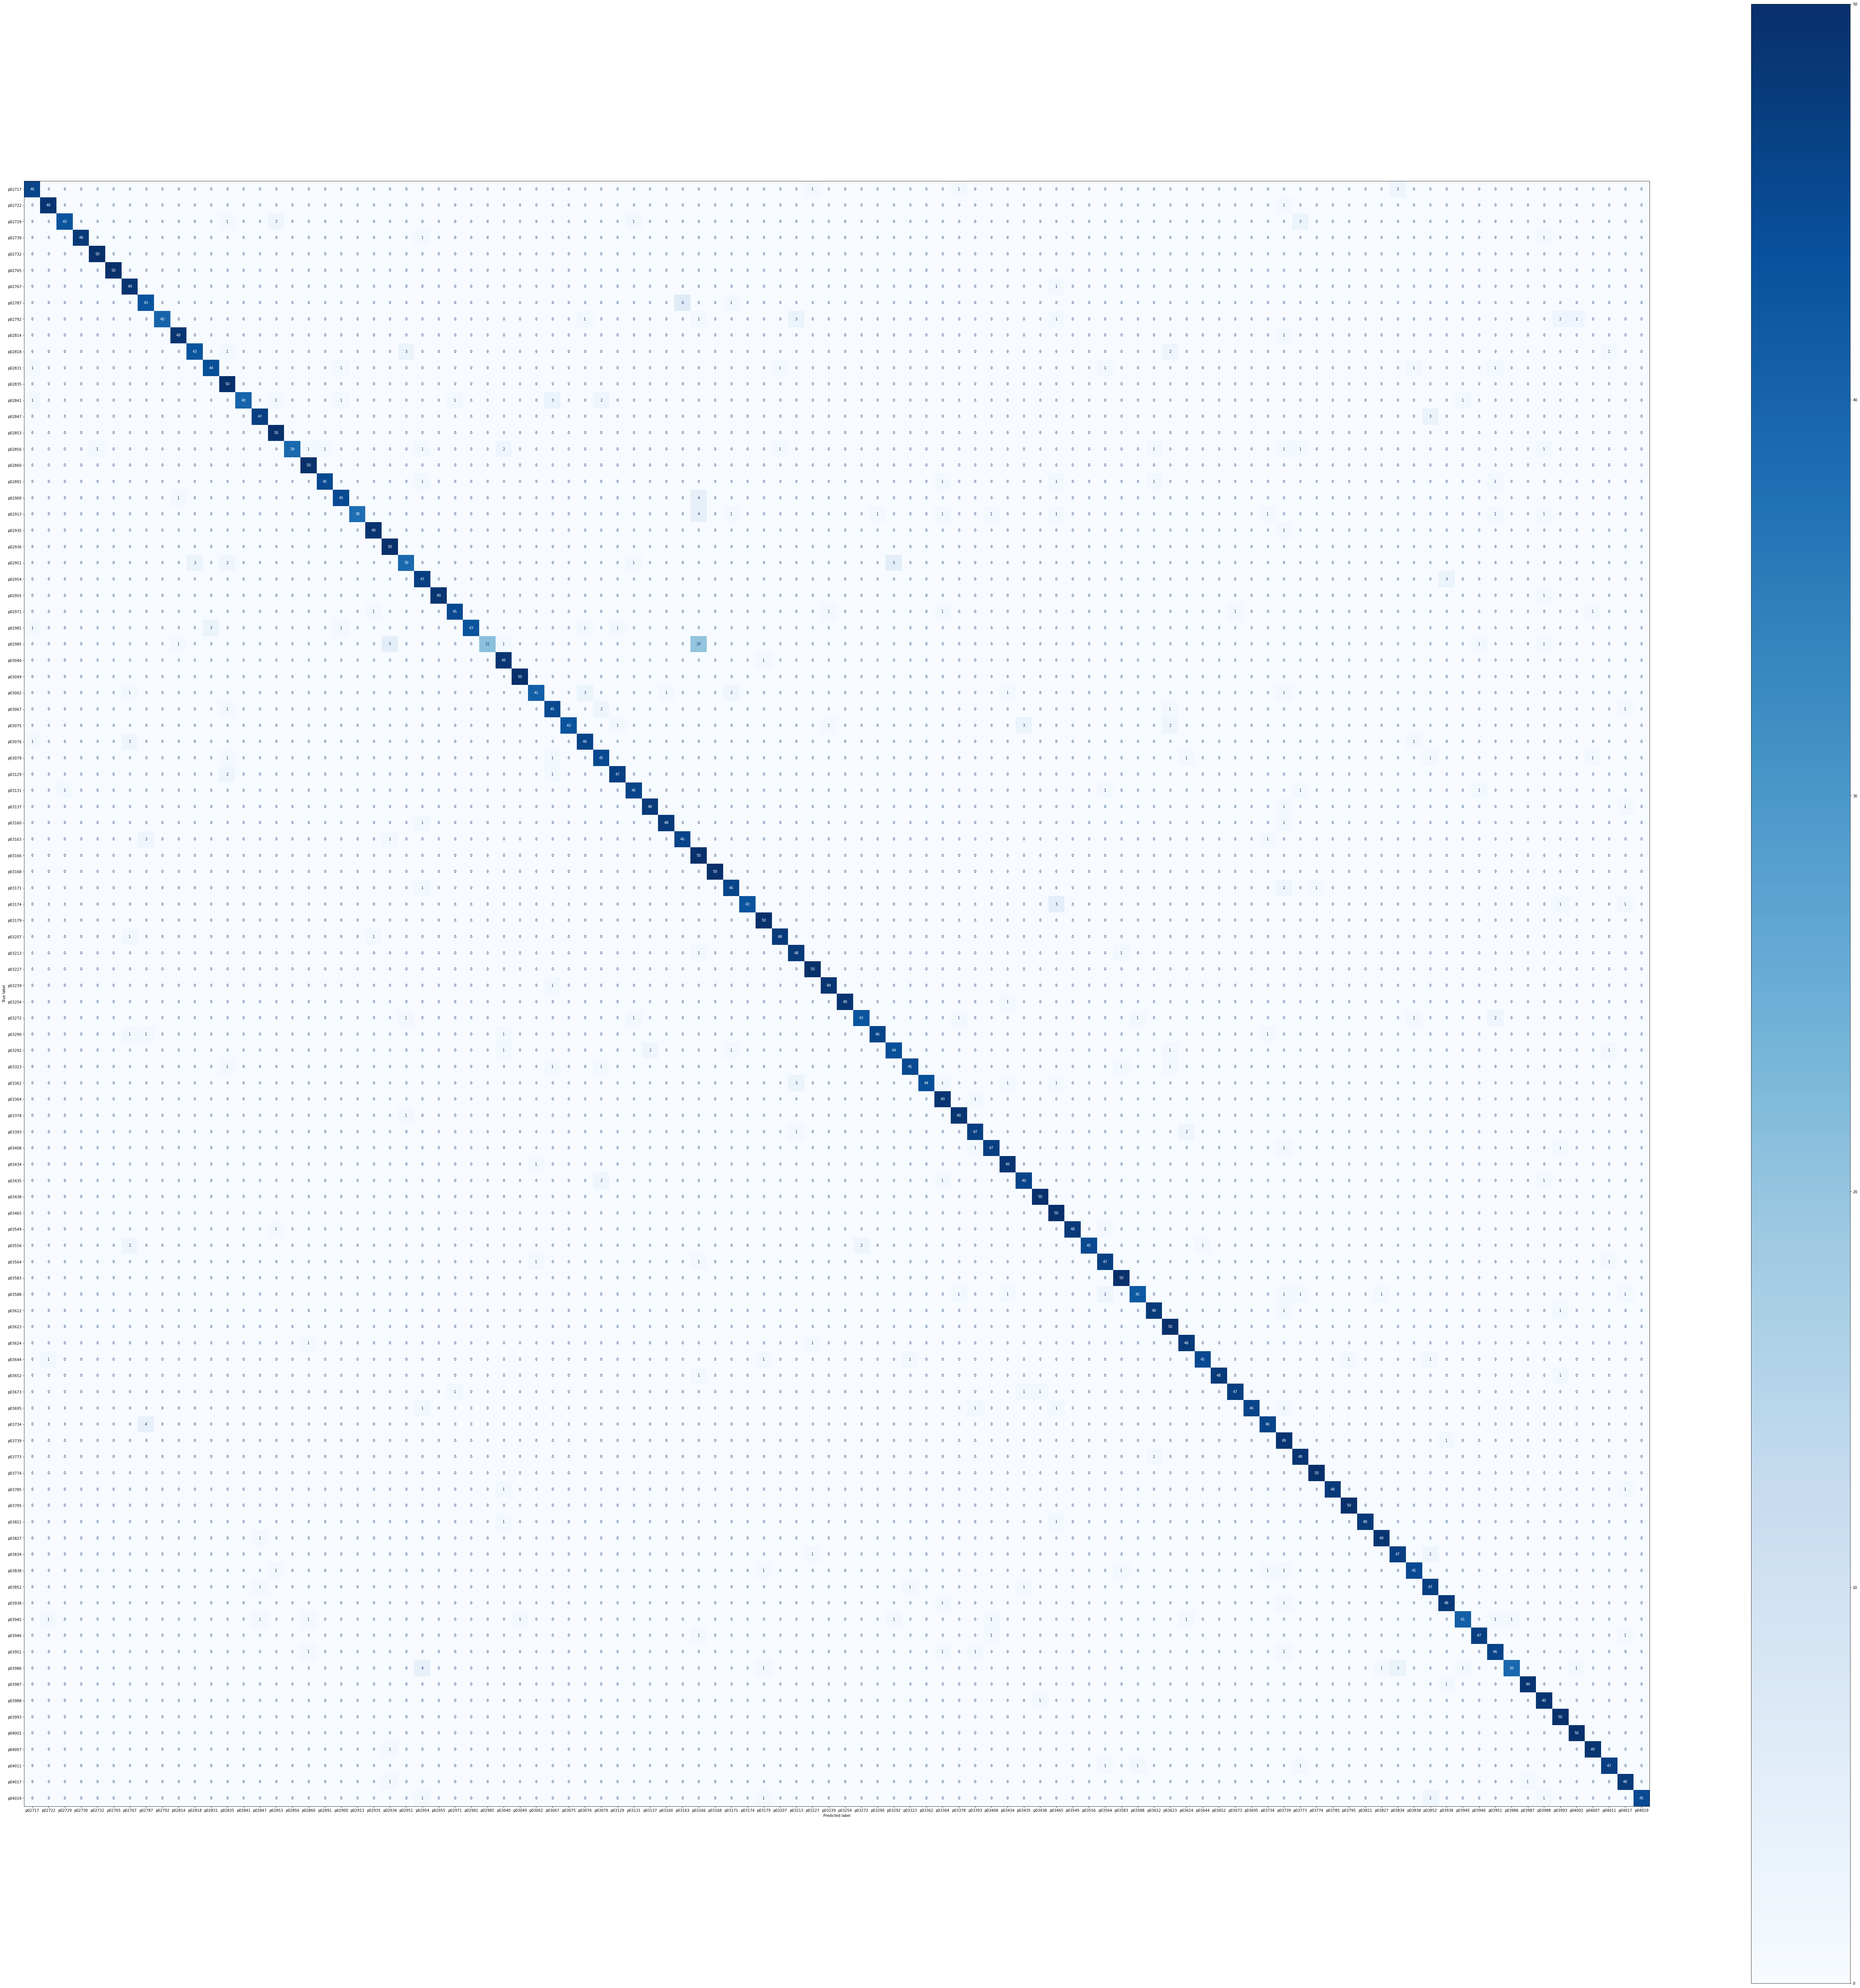

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(100, 100))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(expected_labels, predicted_labels, labels=labels))

              precision    recall  f1-score   support

      p02717       0.92      0.92      0.92        50
      p02722       0.96      0.98      0.97        50
      p02729       0.98      0.86      0.91        50
      p02730       1.00      0.96      0.98        50
      p02732       0.98      1.00      0.99        50
      p02765       1.00      1.00      1.00        50
      p02767       0.88      0.98      0.92        50
      p02787       0.86      0.86      0.86        50
      p02792       1.00      0.80      0.89        50
      p02814       0.96      0.98      0.97        50
      p02818       0.93      0.86      0.90        50
      p02831       0.94      0.88      0.91        50
      p02835       0.85      1.00      0.92        50
      p02841       1.00      0.80      0.89        50
      p02847       0.94      0.94      0.94        50
      p02853       0.91      1.00      0.95        50
      p02856       1.00      0.78      0.88        50
      p02860       0.93    

In [11]:
from collections import Counter
nodes, children = test_generator.__getitem__(0)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
one_hot_node_type_name = nodes[0][0]
node_list = list(dataset.get_vocabulary_map())
node_list[0]
node_list[argmax(one_hot_node_type_name)-1]

'CompilationUnit'

In [12]:
node_list = list(dataset.get_vocabulary_map())
overall_importance = {}
for test_item in test_generator:
    nodes, children = test_item[0]
    conv_filter_activations = model.conv_layer([nodes, children])
    node_importance = model.pooling_layer(conv_filter_activations)[0]
    node_importance_list = node_importance.numpy().tolist()[0]
    counter = Counter(node_importance_list)
    for node_id, value in counter.items():
        one_hot_node_type = nodes[0][node_id]
        node_type = node_list[argmax(one_hot_node_type)-1]
        if node_type in overall_importance:
            overall_importance[node_type] += value
        else:
            overall_importance[node_type] = value

In [13]:
for w in sorted(overall_importance, key=overall_importance.get, reverse=True):
    print(w, overall_importance[w])

CompilationUnit 1859049
BinaryExpression 519472
BlockStatement 136769
FunctionDefinition 121380
FunctionCallExpression 64830
VariableDefinition 43427
ArrayAccess 33890
UnaryExpression 29756
IfStatement 21391
IdentifierReference 14154
NameSpaceDefinition 12570
Divide 12416
Subtract 9205
Add 7546
UnnamedTypeReference 7467
ConditionalExpression 7374
Equal 6945
Modulus 6841
QualifiedOverData 6201
NotGreater 5947
BitLeftShift 5397
And 4892
ReturnStatement 4768
CharLiteral 4143
NotLess 3890
ForCheckBeforeStatement 3797
WhileStatement 3767
NotEqual 3448
Greater 3351
AggregateExpression 3328
CollectionExpression 3323
StringLiteral 3196
CastExpression 2930
Multiply 2812
Or 2189
IntegerLiteral 2002
BreakStatement 1811
RealLiteral 1622
Exponent 1305
BitAnd 1174
NamedType 1158
ContinueStatement 1014
BitOr 986
UnaryMinus 939
BooleanLiteral 920
PostDecrement 767
AddressOf 493
Not 427
DoWhileStatement 388
QualifiedOverPointer 349
BitXor 336
Deref 326
StructureType 274
SwitchStatement 262
CaseBlock 19

In [17]:
test_files[200]

'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\1_clean_datasets\\cpp14_100_1000\\ai4code_problem_class_astm\\test\\s041086582.cpp.pkl'

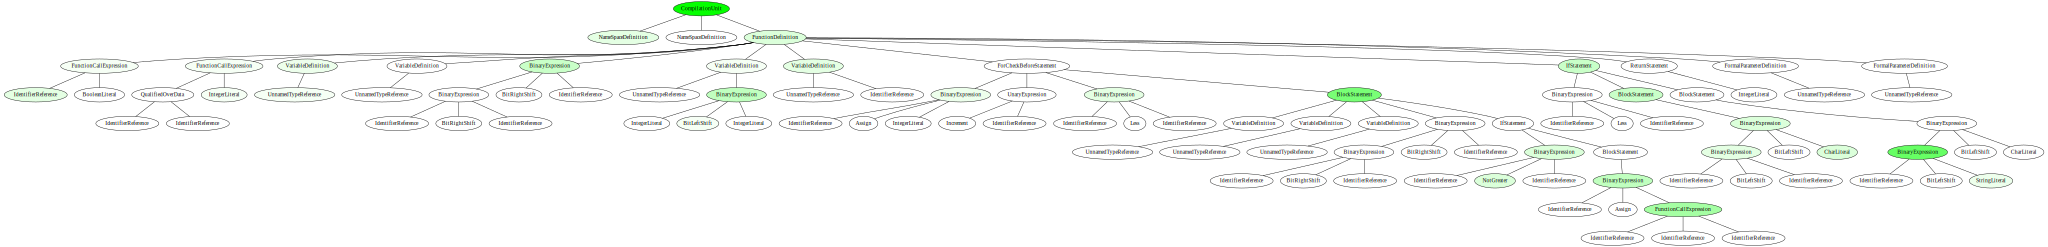

In [16]:
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 200
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)

In [5]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000\ai4code_problem_class_astm2", r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\cpp14_100_1000\ai4code_astm2", 800, 50, 50)

In [6]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02722 ...
... finished p02722
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02732 ...
... finished p02732
processing p02765 ...
... finished p02765
processing p02767 ...
... finished p02767
processing p02787 ...
... finished p02787
processing p02792 ...
... finished p02792
processing p02814 ...
... finished p02814
processing p02818 ...
... finished p02818
processing p02831 ...
... finished p02831
processing p02835 ...
... finished p02835
processing p02841 ...
... finished p02841
processing p02847 ...
... finished p02847
processing p02853 ...
... finished p02853
processing p02856 ...
... finished p02856
processing p02860 ...
... finished p02860
processing p02891 ...
... finished p02891
processing p02900 ...
... finished p02900
processing p02913 ...
... finished p02913
processing p02935 ...
... finished p02935
processing p02936 ...
... finished p02936
processing p02951 ...
... finished

In [8]:
dataset.get_vocabulary_map()

{'ASTM_UNK': 1,
 'Add': 2,
 'AddressOf': 3,
 'AggregateExpression': 4,
 'And': 5,
 'ArrayAccess': 6,
 'ArrayType': 7,
 'Assign': 8,
 'BinaryExpression': 9,
 'BitAnd': 10,
 'BitLeftShift': 11,
 'BitNot': 12,
 'BitOr': 13,
 'BitRightShift': 14,
 'BitXor': 15,
 'BlockStatement': 16,
 'Boolean': 17,
 'BooleanLiteral': 18,
 'BreakStatement': 19,
 'CaseBlock': 20,
 'CastExpression': 21,
 'CatchBlock': 22,
 'CharLiteral': 23,
 'Character': 24,
 'ClassType': 25,
 'CollectionExpression': 26,
 'CompilationUnit': 27,
 'ConditionalExpression': 28,
 'ContinueStatement': 29,
 'Decrement': 30,
 'DefaultBlock': 31,
 'Deref': 32,
 'DerivesFrom': 33,
 'Dimension': 34,
 'Divide': 35,
 'DoWhileStatement': 36,
 'Double': 37,
 'EmptyStatement': 38,
 'EnumLiteralDefinition': 39,
 'EnumType': 40,
 'Equal': 41,
 'Exponent': 42,
 'ForCheckBeforeStatement': 43,
 'FormalParameterDeclaration': 44,
 'FormalParameterDefinition': 45,
 'FunctionCallExpression': 46,
 'FunctionDeclaration': 47,
 'FunctionDefinition': 48